In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [57]:
import pandas as pd

# Define the tasks
tasks = ['p1', 'p2', 'p3', 'p4']
import os
# Loop over each task
for task in tasks:
    results_path = f'./{task}/'
    algorithms = sorted(['Random', 'Greedy', 'SARSA', 'QLearn', 'Reinforce', 'ActorCritic', 'WSLS','HMM','Momentum','Bayesian','OnlineSVM-Individual-Model','OfflineSVM-Individual-Model','QLearnAligned-Individual-Model'])
    print('Processing for task', task)

    # Initialize an empty DataFrame to store results for the task
    df_all = pd.DataFrame()

    for algo in algorithms:
        try:
            # Read the CSV file for the algorithm
            print(f'Processing for {algo}')
            df = pd.read_csv(results_path + algo + '.csv')

            if task in ['p1','p2']:
                df['Openended'] = 'Focused'
            else:
                df['Openended'] = 'Openended'
            # Add a 'task' column to the DataFrame
            df['Task'] = task

            # Add an 'Algorithm' column to the DataFrame
            df['Algorithm'] = algo
        except FileNotFoundError:
            print('No file for', algo)
            continue
        #remove rows with threshold 0.05
        df = df[df['Threshold'] == 0.8]
        # Concatenate the current DataFrame with the DataFrame for all algorithms
        df_all = pd.concat([df_all, df])

        print('Unique users for', algo, 'in', task, 'are', df['User'].nunique())
        print('unique thresholds for', algo, 'in', task, 'are', df['Threshold'].nunique())

        dataset= 'Movies'
        filename = f'all_experiments_{dataset}_{task}.csv'
        df_all.to_csv(filename, index=False)
    print('Length of data for task', task, 'is', len(df_all))











Processing for task p1
Processing for ActorCritic
Unique users for ActorCritic in p1 are 36
unique thresholds for ActorCritic in p1 are 1
Processing for Bayesian
Unique users for Bayesian in p1 are 36
unique thresholds for Bayesian in p1 are 1
Processing for Greedy
Unique users for Greedy in p1 are 36
unique thresholds for Greedy in p1 are 1
Processing for HMM
Unique users for HMM in p1 are 36
unique thresholds for HMM in p1 are 1
Processing for Momentum
Unique users for Momentum in p1 are 36
unique thresholds for Momentum in p1 are 1
Processing for OfflineSVM-Individual-Model
Unique users for OfflineSVM-Individual-Model in p1 are 36
unique thresholds for OfflineSVM-Individual-Model in p1 are 1
Processing for OnlineSVM-Individual-Model
Unique users for OnlineSVM-Individual-Model in p1 are 36
unique thresholds for OnlineSVM-Individual-Model in p1 are 1
Processing for QLearn
Unique users for QLearn in p1 are 36
unique thresholds for QLearn in p1 are 1
Processing for QLearnAligned-Individ

In [58]:
#combine all task data into a single file
tasks = ['p1', 'p2', 'p3', 'p4']
df_all_master= pd.DataFrame()
# Loop over each task
for task in tasks:
    dataset= 'Movies'
    filename = f'all_experiments_{dataset}_{task}.csv'
    df = pd.read_csv(filename)
    print(f'Processing for {task} length of data is {len(df)}')
    df_all_master = pd.concat([df_all_master, df])

print(f'Per algorithm data is {df_all_master.groupby("Algorithm").size()}')

Processing for p1 length of data is 468
Processing for p2 length of data is 468
Processing for p3 length of data is 468
Processing for p4 length of data is 468
Per algorithm data is Algorithm
ActorCritic                       144
Bayesian                          144
Greedy                            144
HMM                               144
Momentum                          144
OfflineSVM-Individual-Model       144
OnlineSVM-Individual-Model        144
QLearn                            144
QLearnAligned-Individual-Model    144
Random                            144
Reinforce                         144
SARSA                             144
WSLS                              144
dtype: int64


In [59]:
# Load the uploaded CSV file
#save the combined data to a file
df_all_master.to_csv('all_experiments_Movies.csv', index=False)
#read the file
file_path = 'all_experiments_Movies.csv'
data_movies = pd.read_csv(file_path)
data_movies['Algorithm'].replace({'ActorCritic': 'Actor-Critic','OfflineSVM-Individual-Model':'OfflineSVM', 'QLearnAligned-Individual-Model':'QLearn-Aligned', 'OnlineSVM-Individual-Model':'OnlineSVM'}, inplace=True)
#size of data per algorithm
data_movies.groupby('Algorithm').size()

Algorithm
Actor-Critic      144
Bayesian          144
Greedy            144
HMM               144
Momentum          144
OfflineSVM        144
OnlineSVM         144
QLearn            144
QLearn-Aligned    144
Random            144
Reinforce         144
SARSA             144
WSLS              144
dtype: int64

In [130]:


def create_plot(data_threshold, svg_file_path, title, selected_algorithms=None):
    # Set plot style
    sns.set_style('whitegrid')

    # Filter algorithms if provided
    if selected_algorithms:
        data_threshold = data_threshold[data_threshold['Algorithm'].isin(selected_algorithms)]
    else:
        selected_algorithms = data_threshold['Algorithm'].unique()

    algorithms = sorted(selected_algorithms)

    # Create a color palette for algorithms
    color_map = {algo: sns.color_palette('tab20')[i] for i, algo in enumerate(algorithms)}

    # Sort the data by algorithm order
    data_threshold.sort_values(by='Algorithm')
    data_threshold['ThresholdAccuracy'] = data_threshold['Accuracy'] * 100

    # Create the plot
    plt.figure(figsize=(9, 5))
    ax = sns.boxplot(
        x='Algorithm', y='ThresholdAccuracy', data=data_threshold,
        palette=color_map, linewidth=1.5, fliersize=3
    )

    # Add mean accuracy values as text on the plot
    means = data_threshold.groupby('Algorithm')['ThresholdAccuracy'].mean()
    x_ticks = ax.get_xticks()  # Get the x positions of the boxes on the plot
    for i, algorithm in enumerate(ax.get_xticklabels()):
        algorithm_name = algorithm.get_text()  # Get the algorithm name from the x-axis label
        mean_val = means[algorithm_name]
        ax.text(x_ticks[i], mean_val, f'{mean_val:.2f}',
                horizontalalignment='center', color='black', weight='semibold')

    # Customizations for better aesthetics
    plt.xticks(rotation=30, ha='right', fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    plt.ylabel('Accuracy (%)', fontsize=12, weight='bold')
    plt.xlabel('Algorithm', fontsize=12, weight='bold')
    #plt.title(title, fontsize=14, weight='bold', pad=20)

    # Improve plot margins and layout
    #plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Print color map (for debugging purposes)
    print(f'Color map is {color_map}')

    # Save the plot if file path is provided
    if svg_file_path:
        plt.savefig(svg_file_path, format='png', bbox_inches='tight')

    plt.show()
    plt.close()



Size per algorithm is Algorithm
ActorCritic                       144
Bayesian                          144
Greedy                            144
HMM                               144
Momentum                          144
OfflineSVM-Individual-Model       144
OnlineSVM-Individual-Model        144
QLearn                            144
QLearnAligned-Individual-Model    144
Random                            144
Reinforce                         144
SARSA                             144
WSLS                              144
dtype: int64
Color map is {'ActorCritic': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Bayesian': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), 'Greedy': (1.0, 0.4980392156862745, 0.054901960784313725), 'HMM': (1.0, 0.7333333333333333, 0.47058823529411764), 'Momentum': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 'OfflineSVM-Individual-Model': (0.596078431372549, 0.8745098039215686, 0.5411764705882353), 'OnlineSVM-In

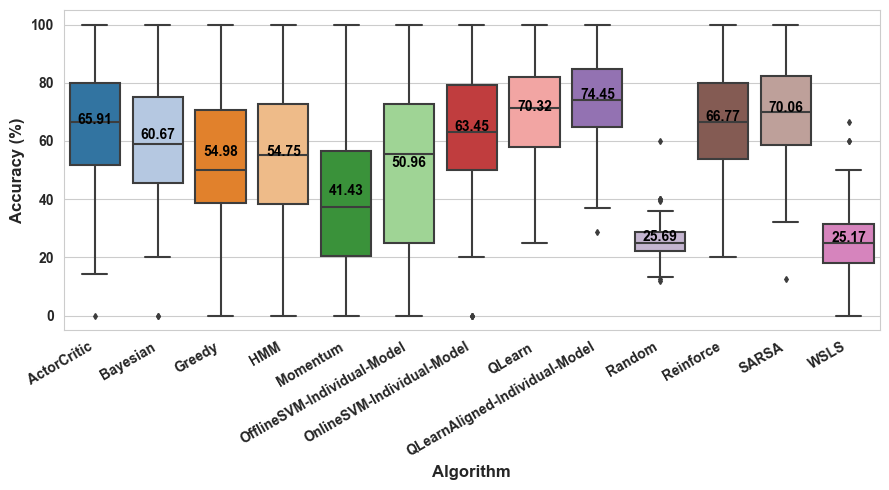

Algorithm
ActorCritic                       144
Bayesian                          144
Greedy                            144
HMM                               144
Momentum                          144
OfflineSVM-Individual-Model       144
OnlineSVM-Individual-Model        144
QLearn                            144
QLearnAligned-Individual-Model    144
Random                            144
Reinforce                         144
SARSA                             144
WSLS                              144
dtype: int64

In [131]:
#specific threshold
data_threshold= data_movies[data_movies['Threshold']==0.8]
data_threshold['ThresholdAccuracy'] = data_threshold['Accuracy']
print(f'Size per algorithm is {data_threshold.groupby("Algorithm").size()}')
create_plot(data_threshold, 'Movies-All-Individual-IUI.png', 'Performance of Individual Level Models on Movies Dataset')
#list rows per algorithm
data_threshold.groupby('Algorithm').size()



Birdstrikes Dataset

In [132]:
import pandas as pd

# Define the tasks
tasks = ['p1', 'p2', 'p3', 'p4']

#delete the previous data
try:
    del df_all
    del df_all_master
    del data_movies
    del data_threshold
except NameError:
    pass



# Loop over each task
for task in tasks:
    results_path = f'../birdstrikes/{task}/'
    algorithms = sorted(['Random', 'Greedy', 'SARSA', 'QLearn', 'Reinforce', 'Actor-Critic', 'WSLS','HMM','Momentum','Bayesian','OnlineSVM','OfflineSVM','QLearn-Aligned'])
    print('Processing for task', task)
    df_all = pd.DataFrame()
    # Loop over each algorithm
    for algo in algorithms:
        try:
            # Read the CSV file for the algorithm
            df = pd.read_csv(results_path + algo + '.csv')
            print(f'Processing for {algo} in {task} length of data is {len(df)}')
            if algo == 'Ottley-HMM':
                df.drop(columns=['rank'], inplace=True)
                df.drop_duplicates(inplace=True)
                df['Threshold']=df['threshold']
                df['Accuracy']=df['ncp-1']
            #openended or not column
            if task in ['p1','p2']:
                df['Openended'] = 'Focused'
            else:
                df['Openended'] = 'Openended'
            # Add a 'task' column to the DataFrame
            df['Task'] = task

            # Add an 'Algorithm' column to the DataFrame
            df['Algorithm'] = algo
        except FileNotFoundError:
            print('No file for', algo)
            continue
        #remove rows with threshold 0.05
        df = df[df['Threshold'] == 0.8]
        # Concatenate the current DataFrame with the DataFrame for all algorithms
        df_all = pd.concat([df_all, df])

        print('Unique users for', algo, 'in', task, 'are', df['User'].nunique())
        print('unique thresholds for', algo, 'in', task, 'are', df['Threshold'].nunique())

        dataset= 'Birdstrikes'
        filename = f'all_experiments_{dataset}_{task}.csv'
        path= f'../birdstrikes/{filename}'
        df_all.to_csv(path, index=False)
    print('Length of data for task', task, 'is', len(df_all))




Processing for task p1
No file for Actor-Critic
Processing for Bayesian in p1 length of data is 324
Unique users for Bayesian in p1 are 36
unique thresholds for Bayesian in p1 are 1
Processing for Greedy in p1 length of data is 360
Unique users for Greedy in p1 are 36
unique thresholds for Greedy in p1 are 1
Processing for HMM in p1 length of data is 324
Unique users for HMM in p1 are 36
unique thresholds for HMM in p1 are 1
Processing for Momentum in p1 length of data is 360
Unique users for Momentum in p1 are 36
unique thresholds for Momentum in p1 are 1
No file for OfflineSVM
No file for OnlineSVM
Processing for QLearn in p1 length of data is 360
Unique users for QLearn in p1 are 36
unique thresholds for QLearn in p1 are 1
No file for QLearn-Aligned
Processing for Random in p1 length of data is 360
Unique users for Random in p1 are 36
unique thresholds for Random in p1 are 1
Processing for Reinforce in p1 length of data is 360
Unique users for Reinforce in p1 are 36
unique threshold

In [133]:
#combine all task data into a single file
tasks = ['p1', 'p2', 'p3', 'p4']
df_all_master= pd.DataFrame()
# Loop over each task
for task in tasks:
    dataset= 'Birdstrikes'
    filename = f'all_experiments_{dataset}_{task}.csv'
    path= f'../birdstrikes/{filename}'
    df = pd.read_csv(path)
    print(f'Processing for {task} length of data is {len(df)}')
    df_all_master = pd.concat([df_all_master, df])

print(f'Per algorithm data is {df_all_master.groupby("Algorithm").size()}')

Processing for p1 length of data is 324
Processing for p2 length of data is 324
Processing for p3 length of data is 324
Processing for p4 length of data is 324
Per algorithm data is Algorithm
Bayesian     144
Greedy       144
HMM          144
Momentum     144
QLearn       144
Random       144
Reinforce    144
SARSA        144
WSLS         144
dtype: int64


In [134]:
# Load the uploaded CSV file
#save the combined data to a file
path= f'../birdstrikes/all_experiments_Birdstrikes.csv'
df_all_master.to_csv(path, index=False)
#read the file
file_path = path
data_birdstrikes = pd.read_csv(file_path)
data_birdstrikes['Algorithm'].replace({'ActorCritic': 'Actor-Critic','OfflineSVM-Individual-Model':'OfflineSVM', 'QLearnAligned-Individual-Model':'QLearn-Aligned', 'OnlineSVM-Individual-Model':'OnlineSVM'}, inplace=True)
#size of data per algorithm
data_birdstrikes.groupby('Algorithm').size()

Algorithm
Bayesian     144
Greedy       144
HMM          144
Momentum     144
QLearn       144
Random       144
Reinforce    144
SARSA        144
WSLS         144
dtype: int64

Size per algorithm is Algorithm
Bayesian     144
Greedy       144
HMM          144
Momentum     144
QLearn       144
Random       144
Reinforce    144
SARSA        144
WSLS         144
dtype: int64
Color map is {'Bayesian': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Greedy': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), 'HMM': (1.0, 0.4980392156862745, 0.054901960784313725), 'Momentum': (1.0, 0.7333333333333333, 0.47058823529411764), 'QLearn': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 'Random': (0.596078431372549, 0.8745098039215686, 0.5411764705882353), 'Reinforce': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 'SARSA': (1.0, 0.596078431372549, 0.5882352941176471), 'WSLS': (0.5803921568627451, 0.403921568627451, 0.7411764705882353)}


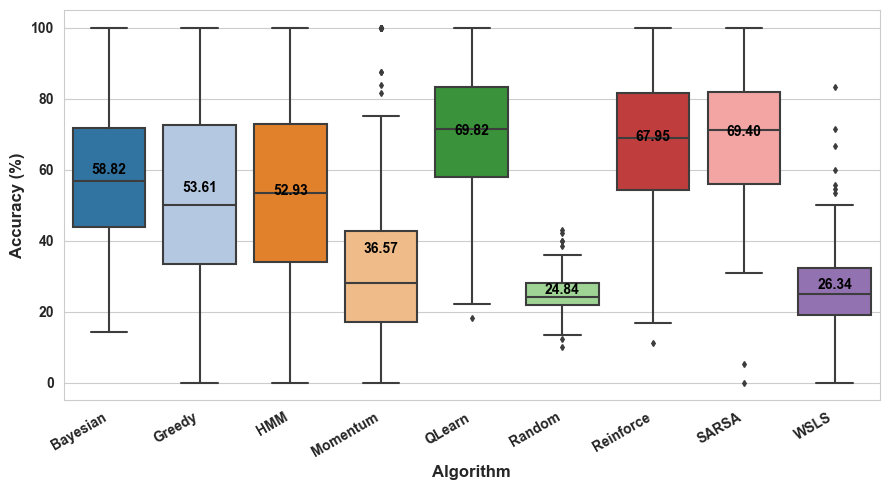

Algorithm
Bayesian     144
Greedy       144
HMM          144
Momentum     144
QLearn       144
Random       144
Reinforce    144
SARSA        144
WSLS         144
dtype: int64

In [135]:
data_threshold= data_birdstrikes[data_birdstrikes['Threshold']==0.8]
data_threshold['ThresholdAccuracy'] = data_threshold['Accuracy']
print(f'Size per algorithm is {data_threshold.groupby("Algorithm").size()}')
create_plot(data_threshold, f'../birdstrikes/BirdStrikes-All-Individual-IUI.png', 'Performance of Individual Level Models on BirdStrikes Dataset')
#list rows per algorithm
data_threshold.groupby('Algorithm').size()

In [136]:
def rename_algorithms(data):
    data['Algorithm'].replace({'ActorCritic': 'Actor-Critic','OfflineSVM-Individual-Model':'OfflineSVM', 'QLearnAligned-Individual-Model':'QLearn-Aligned', 'OnlineSVM-Individual-Model':'OnlineSVM'}, inplace=True)
    return data

In [137]:
def select_algorithms(data, selected_algorithms):
    data = data[data['Algorithm'].isin(selected_algorithms)]
    return data

Size per algorithm is Algorithm
Actor-Critic      144
Bayesian          288
Greedy            288
HMM               288
Momentum          288
OfflineSVM        144
OnlineSVM         144
QLearn            288
QLearn-Aligned    144
Random            288
Reinforce         288
SARSA             288
WSLS              288
dtype: int64
Color map is {'Bayesian': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Greedy': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), 'HMM': (1.0, 0.4980392156862745, 0.054901960784313725), 'Momentum': (1.0, 0.7333333333333333, 0.47058823529411764), 'OfflineSVM': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 'OnlineSVM': (0.596078431372549, 0.8745098039215686, 0.5411764705882353), 'QLearn': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 'QLearn-Aligned': (1.0, 0.596078431372549, 0.5882352941176471)}


/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_15069/2064903371.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_threshold['ThresholdAccuracy'] = data_threshold['Accuracy'] * 100


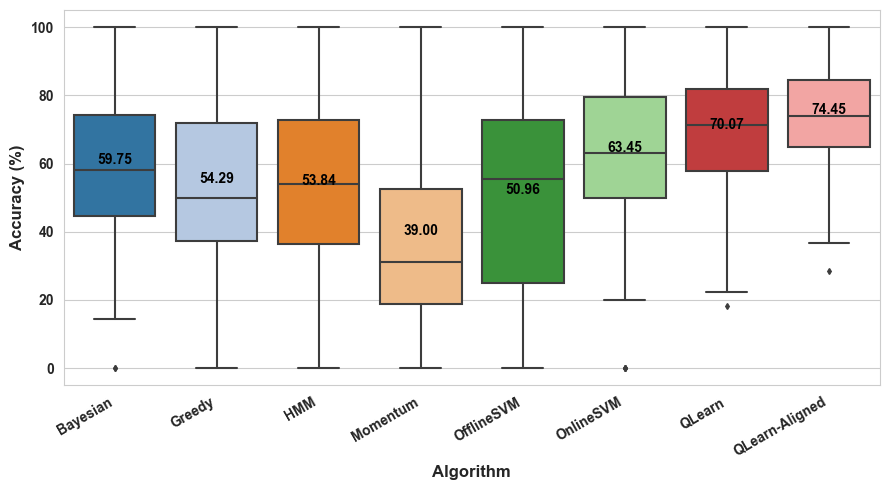

/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_15069/3714682785.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_threshold.groupby('Algorithm').mean() - data_threshold[data_threshold['Algorithm']=='QLearn'].mean()
/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_15069/3714682785.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_threshold.groupby('Algorithm').mean() - data_threshold[data_threshold['Algorithm']=='QLearn'].mean()


,Accuracy,Discount,Epsilon,GranularPredictions,GroundTruth,LearningRate,Predictions,Reward,StateAccuracy,Temperature,Threshold,ThresholdAccuracy
Algorithm,,,,,,,,,,,,
Actor-Critic,-0.041571,0.106458,-8.996528e-02,NaN,NaN,-0.186658,NaN,-1.03348,NaN,1.0,1.110223e-16,-0.041571
Bayesian,-0.103228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110223e-16,-0.103228
Greedy,-0.157751,-0.288194,NaN,NaN,NaN,-0.217832,NaN,-1.03348,NaN,NaN,1.110223e-16,-0.157751
HMM,-0.162307,-0.288194,NaN,NaN,NaN,-0.217832,NaN,NaN,NaN,NaN,1.110223e-16,-0.162307
Momentum,-0.310690,-0.288194,NaN,NaN,NaN,-0.217832,NaN,NaN,NaN,NaN,1.110223e-16,-0.310690
OfflineSVM,-0.191036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110223e-16,-0.191036
OnlineSVM,-0.066217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110223e-16,-0.066217
QLearn,0.000000,0.000000,-1.387779e-17,NaN,NaN,0.000000,NaN,0.00000,NaN,0.0,1.110223e-16,0.000000
QLearn-Aligned,0.043864,0.116389,-4.586806e-02,NaN,NaN,-0.210229,NaN,NaN,NaN,0.0,1.110223e-16,0.043864


In [138]:
#combine both dataset and create a plot
data_movies= pd.read_csv('all_experiments_Movies.csv')
birdstrikes_path= f'../birdstrikes/all_experiments_Birdstrikes.csv'
data_birdstrikes= pd.read_csv(birdstrikes_path)
data_combined= pd.concat([data_movies, data_birdstrikes])
data_combined['Algorithm'].replace({'ActorCritic': 'Actor-Critic','OfflineSVM-Individual-Model':'OfflineSVM', 'QLearnAligned-Individual-Model':'QLearn-Aligned', 'OnlineSVM-Individual-Model':'OnlineSVM'}, inplace=True)
data_combined.groupby('Algorithm').size()

data_threshold= data_combined[data_combined['Threshold']==0.8]
data_threshold['ThresholdAccuracy'] = data_threshold['Accuracy']
print(f'Size per algorithm is {data_threshold.groupby("Algorithm").size()}')
#print difference between q learning and other algorithms

data_threshold= rename_algorithms(data_threshold)


create_plot(data_threshold, 'Combined-All-Individual-IUI.png', 'Performance of Individual Level Models on Voyager Study', selected_algorithms=['Greedy', 'QLearn', 'HMM','Momentum','Bayesian','OnlineSVM','OfflineSVM','QLearn-Aligned'])
data_threshold.groupby('Algorithm').mean() - data_threshold[data_threshold['Algorithm']=='QLearn'].mean()
